# Group Proposal

By: Tracy Gan, Zhuoran Wang, Bruce Xie

## Heart Disease
Today we will explore the heart disease dataset. We want to create a classifier model to predict whether a patient has heart disease by using age, cholesterol and maximum heart rate as variables. 

The columns in this dataset are:
1. Age - (years)
2. Sex 
3. Chest Pain Type - (1 = typical angina)
                     (2 = atypical angina)
                     (3 = non-anginal pain)
                     (4 = asymptomatic)
4. Resting Blood Pressure - (mm Hg)
5. Cholesterol -(mg/dl)
6. Fasting Blood Sugar - (> 120 mg/dl)
                       - (1 = true; 0 = false)
7. Resting Electrocardiogram
8. Maximum heart rate
9. Exercised induced angina - (1 = yes; 0 = no)
10. ST depression induced by exercise relative to rest
11. Slope of peak exercise ST segment
12. Number of major vessels 
13. Blood disorder - 3 = normal
                     6 = fixed defect
                     7 = reversible defect
14. Heart disease status - either yes or no 

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
set.seed(20)

heart_data_1 <- read_csv("data/processed.cleveland (1).data", col_names = FALSE) |>
                mutate(X14 = as_factor(X14)) 
                
colnames(heart_data_1) <- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach",
                                    "exang","oldpeak","slope","ca","thal","num") 
heart_data <- heart_data_1 |>
                mutate(num=recode(num, "0" = "no",
                                       "1" = "yes",
                                       "2" = "yes",
                                       "3" = "yes",
                                       "4" = "yes")) |>
                mutate(sex=recode(sex, "1" = "male",
                                       "0" = "female"))
                           
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,no
67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,yes
67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,yes
57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,yes
38,male,3,138,175,0,0,173,0,0.0,1,?,3.0,no


We read the .csv file into R using read_csv. We didn't clean the data into tidy data, as the data is already tidy.

In [3]:
nrow(heart_data) 
heart_proportion <- heart_data |>
                    group_by(num) |>
                    summarise(n=n()) |>
                    mutate(proportion= n/303)
                    
heart_proportion

[1] 303

num,n,proportion
<fct>,<int>,<dbl>
no,164,0.5412541
yes,139,0.4587459


This proportion of patients having heart disease or not shows that our data is not biased as there is a good amount of both data.

In [4]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = num) 
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

We split our data into 75% of training data and 25% of testing data. This ensures that we have a large enough dataset for both the training and testing data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 20 rows containing missing values (geom_bar).”


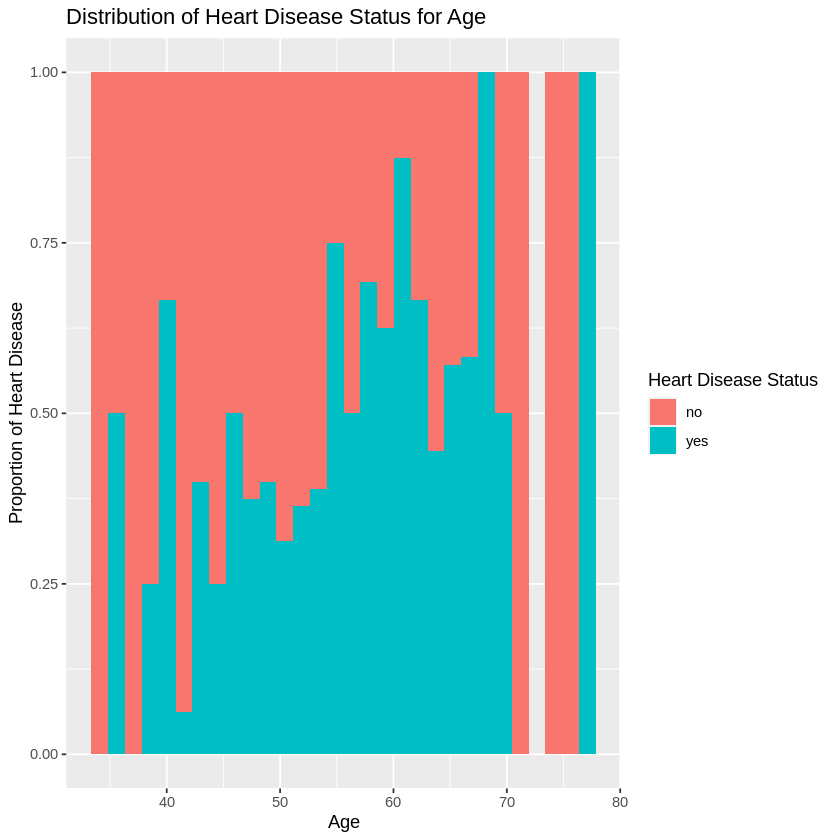

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


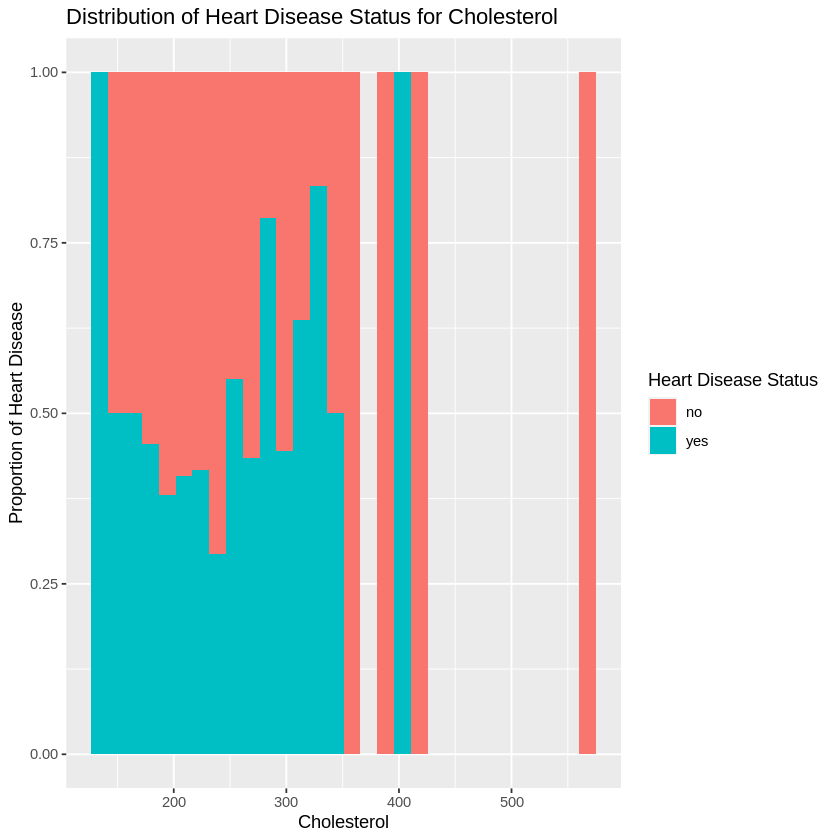

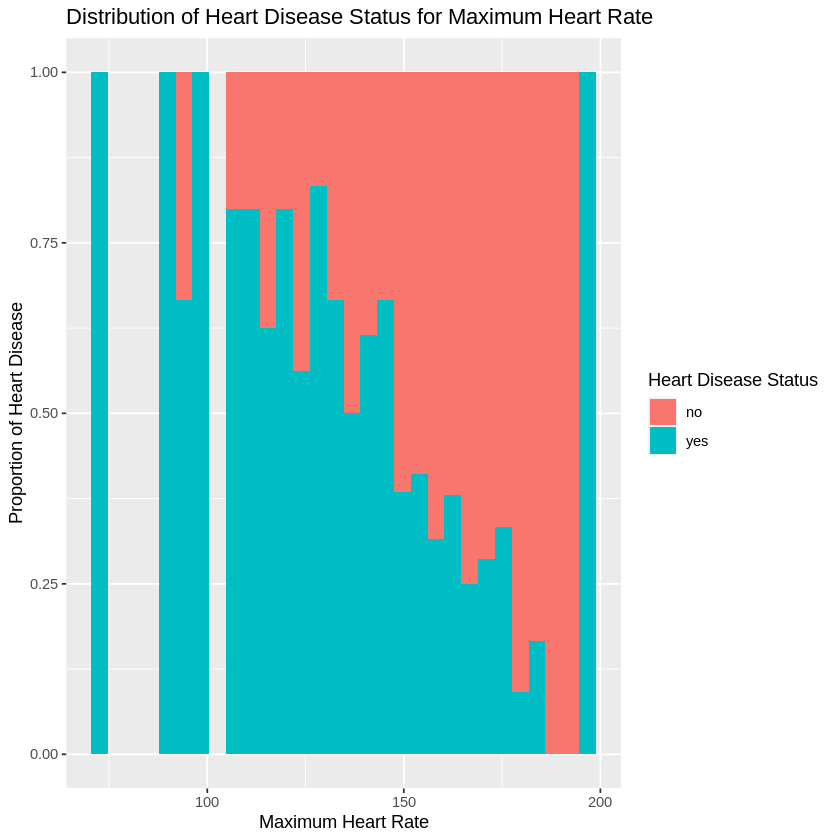

In [5]:
heart_histogram_a <- heart_train |>
                ggplot(aes (x = age ,fill = num)) +
                geom_histogram(position = "fill") +
                ggtitle("Distribution of Heart Disease Status for Age") +
                labs(x = "Age", y = "Proportion of Heart Disease", fill = "Heart Disease Status")
heart_histogram_a

heart_histogram_c <- heart_train |>
                ggplot(aes (x = chol ,fill = num)) +
                geom_histogram(position = "fill") +
                ggtitle("Distribution of Heart Disease Status for Cholesterol") +
                labs(x = "Cholesterol", y = "Proportion of Heart Disease", fill = "Heart Disease Status")
heart_histogram_c

heart_histogram_t <- heart_train |>
                ggplot(aes (x = thalach ,fill = num)) +
                geom_histogram(position = "fill") +
                ggtitle("Distribution of Heart Disease Status for Maximum Heart Rate") +
                labs(x = "Maximum Heart Rate", y = "Proportion of Heart Disease", fill = "Heart Disease Status")
heart_histogram_t

We chose age, cholesterol and maximum heart rate as variables because they are important risk factors according to a research article (Peter, 1998). 
These histograms represent the distribution of variables with the proportion of having heart disease.

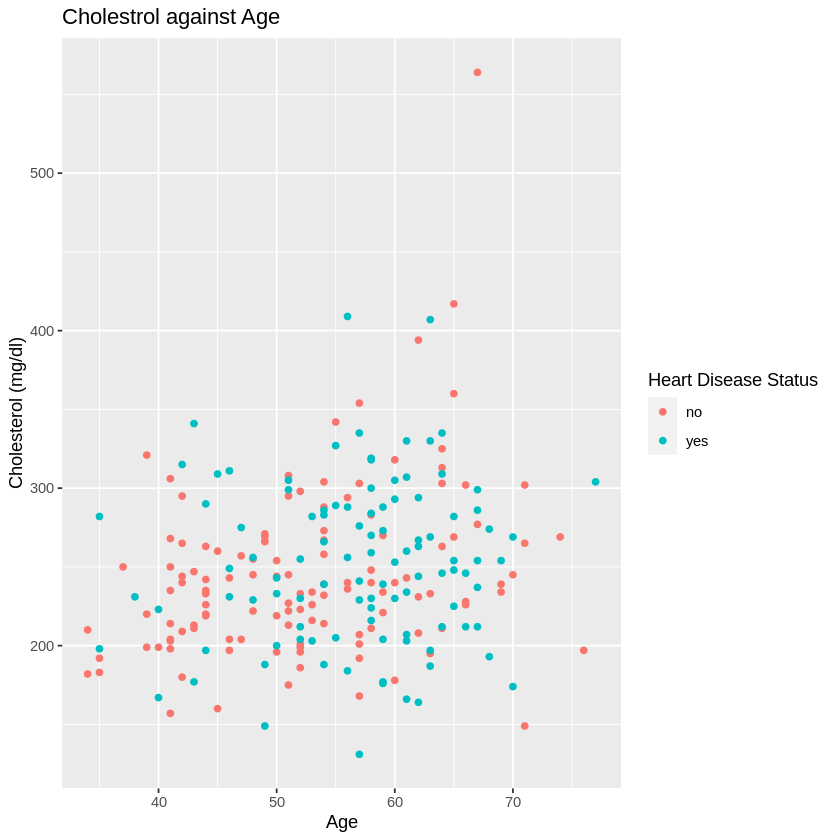

In [6]:
heart_plot_chol <- heart_train |>
            ggplot(aes (x = age, y = chol, color = num)) +
            geom_point() +
            labs(x = "Age", y = "Cholesterol (mg/dl)", color = "Heart Disease Status") +
            ggtitle("Cholestrol against Age")

heart_plot_chol

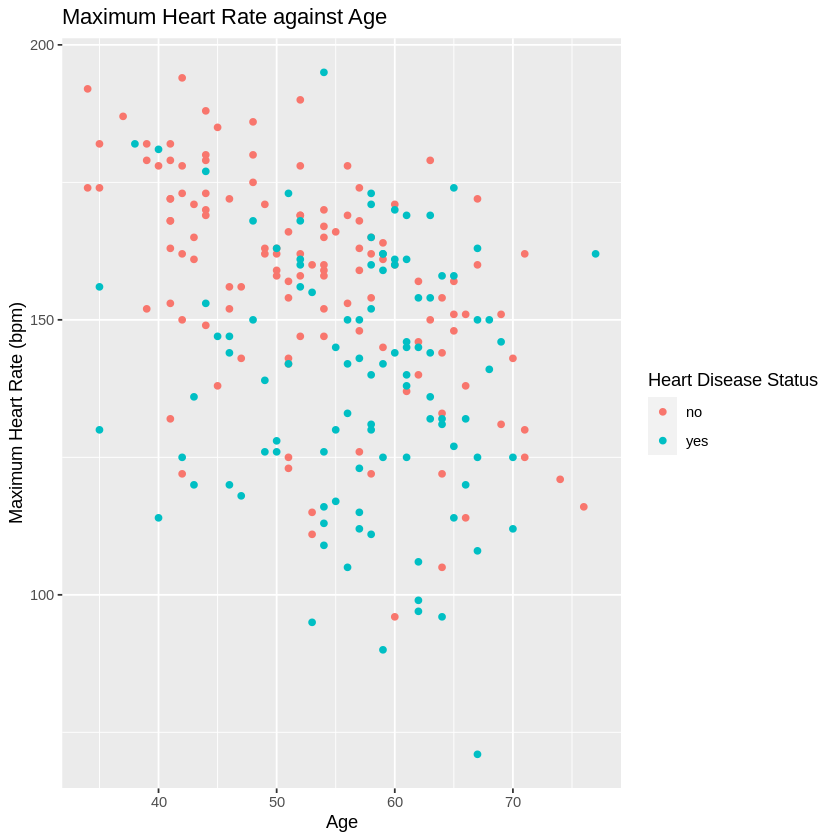

In [7]:
heart_plot_thalach <- heart_train |>
            ggplot(aes (x = age, y = thalach, color = num)) +
            geom_point() +
            labs(x = "Age", y = "Maximum Heart Rate (bpm)", color = "Heart Disease Status") +
            ggtitle("Maximum Heart Rate against Age")
heart_plot_thalach

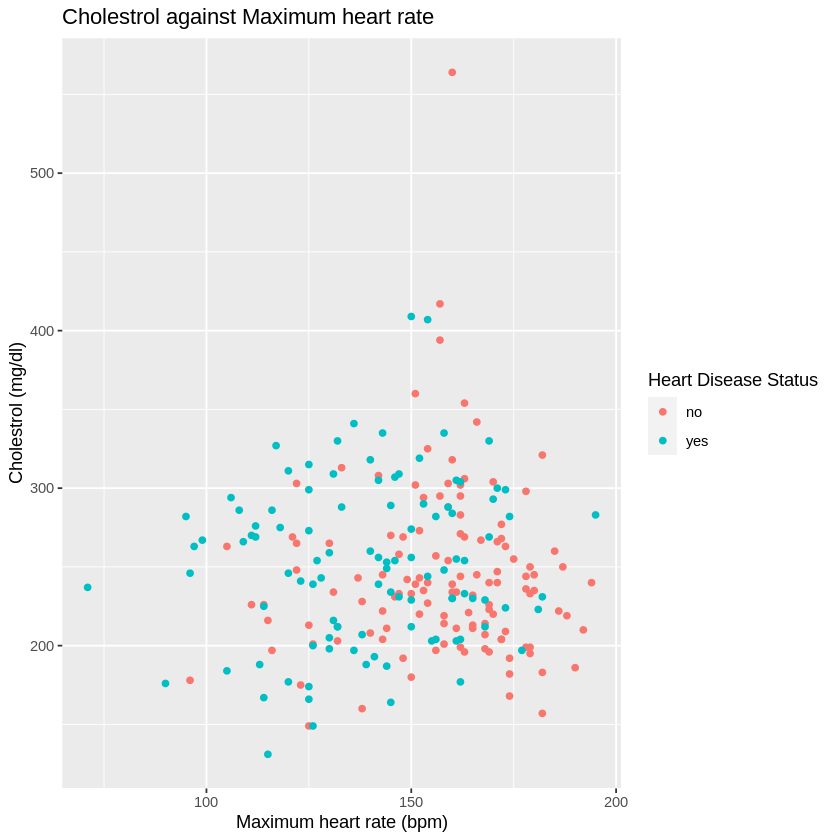

In [8]:
heart_plot_chol <- heart_train |>
            ggplot(aes (x = thalach, y = chol, color= num)) +
            geom_point() +
            labs(x = "Maximum heart rate (bpm)", y = "Cholestrol (mg/dl)", color = "Heart Disease Status") +
            ggtitle("Cholestrol against Maximum heart rate")
heart_plot_chol

# Method
1. Scale and center the training data  
2. Train classifier 
3. Perform cross-validation to determine the most accurate value of K
4. Use K to create our model
5. Add sample observations by inserting data into the scatterplot of our classifier
6. Check where the observations are on the scatterplot

# Limitations in our model: 
1. Our model combined values of num = 1,2,3,4 into num = 1. Hence, our model may have difficulties in differentiating 0 to 4 as the variables we used to predict when num = 0 show fewer symptoms compared to when predicting num = 4.

2. The dataset is not large enough as it does not include some of the patients with a certain age. In the histogram,  there is an age where there are no values to determine the proportion of people with or without heart disease at that age.

# Expected outcomes and significance: 
We want our model to use the variables: age, maximum heart rate and cholesterol levels of a patient, to determine whether the patient has heart disease. This finding can be used to know whether the patient has heart disease earlier on. This allows the treatment for heart disease to be conducted before the condition can deteriorate further. A question that brought up is how we can use our model for other purposes. Instead of our variables being independent of each other, we can use our model to figure out the relationship between our variables.

Citations:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M. (1988). Heart Disease Data Set.      https://archive.ics.uci.edu/ml/datasets/Heart+Disease

2. Peter, W.F.W., Ralph, B.D., Daniel, L., A, M.B., Halit, S., William, B.K. (1998). Prediction of Coronary Heart Disease Using Risk Categories. Circulation, 97(18), 1837-1847. https://doi.org/10.1161/01.CIR.97.18.1837
